# 数据分析

基于Pandas和Numpy两种工具，分析给定数据集包含的特征。主要包括数据探索、数据清洗等，其目的在于保持数据的“整洁”，为后续应用机器学习模型做准备。

整个数据分析流程如下：

1、加载数据：可以直接从网站下载，也可以使用numpy或者Pandas、python等本地加载

2、观察和理解数据：数据集大小，数据集的饱和度，数据集中各个属性的含义、数值分布，正负标签比例等。

3、数据清洗

## 1.加载数据

案例，我们分析一个登船者的生存概率。

In [113]:
import seaborn as sns
import pandas as pd


# tit = sns.load_dataset("titanic")  # 从网站直接下载。
# 或者直接通过函数加载。
# read_csv 函数是读取一个csv类型的文件
data = pd.read_csv("./titanic.csv")  # 加载后的文件是一个dataframe 格式的文件。

## 2.观察数据

In [114]:
##观察和理解数据
data.shape  #观察数据规模


(891, 15)

In [115]:
data.describe() #数据分布描述


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [116]:
data.head(5) #前五条数据记录

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [117]:
data.columns  # 列出所有字段
# 学习相关知识，了解每个字段的含义。

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

![](./p1.png)

In [118]:
# 观察正负标签的比例

# data["survived"].sum()  # 总数
data["survived"].sum()/data.shape[0] # 生存者的比例是38.38%，比例稍微偏低，但可以接受。最好正负标签平衡。
# 或者使用
data["survived"].mean()

0.3838383838383838

In [119]:
# 观察数据的饱和度.
data.isna().sum()/data.shape[0]
# 可以看出deck（舱面）和Age缺少较为严重,分别是70%和19.8%。


survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

<AxesSubplot:>

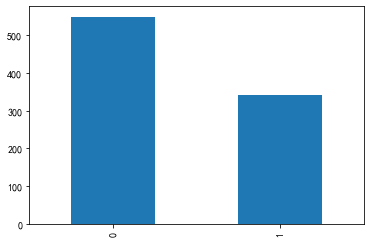

In [120]:
# 观察标签的均衡性
#观察survived的均衡性
data["survived"].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='sex'>

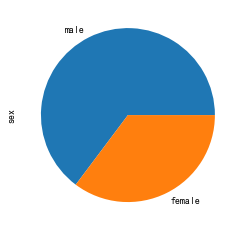

In [121]:
# 观察性别分布
data["sex"].value_counts().plot(kind = "pie")  # 饼状图 

<AxesSubplot:>

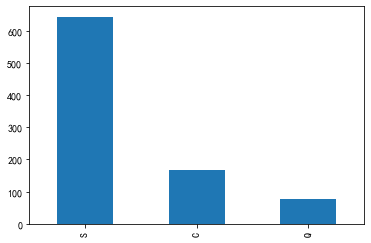

In [122]:
#观察登船港口的分布
data.columns
data["embarked"].value_counts().plot(kind = "bar")  # 类别数据作图

<AxesSubplot:ylabel='Frequency'>

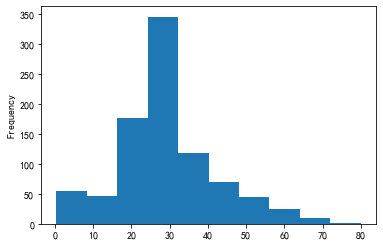

In [135]:
# 观察年龄分布
data["age"].plot(kind="hist")  # 数值型数据不用统计，直接做图

### 热力图分析

热力图是观察数据相关性的利器，可以参考官方网站

[热力图官方网站介绍](http://seaborn.pydata.org/generated/seaborn.heatmap.html)

<AxesSubplot:>

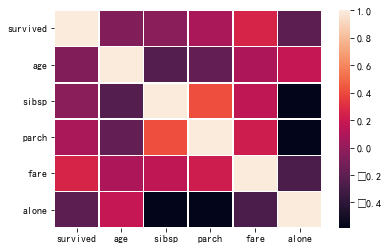

In [136]:
import seaborn as sns  #使用sns做热力图，观察变量间的相关性
sns.heatmap(data.corr(),linewidths=.5)

### 1.2 数据的清洗

 对数据进行删除、补充或者修改，洗掉“杂质”。

In [137]:
# 填充和删除数据 
#获取缺失值情况
    print(data.columns)

Index(['survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class',
       'who', 'deck', 'embark_town', 'alone'],
      dtype='object')


In [126]:
#统计所有列中空值的和
data.isna().sum()  #查看缺省值

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [127]:
# age、deck and embark_town 
data['deck'].fillna('missing',inplace=True) # 用字符“missing”填充
print(data["deck"])



0      missing
1            C
2      missing
3            C
4      missing
        ...   
886    missing
887          B
888    missing
889          C
890    missing
Name: deck, Length: 891, dtype: object


In [128]:
print(data["age"])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64


In [129]:
# 使用平均年龄来填充年龄中的 nan 值
data["age"].fillna(data["age"].mean(),inplace=True)



In [130]:
print(data["age"])
print(data["age"].isna().sum())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64
0


删除操作之前-----
 Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object') (891, 15)
Index(['survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class',
       'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'],
      dtype='object') (891, 14)
Index(['survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class',
       'who', 'deck', 'embark_town', 'alive', 'alone'],
      dtype='object') (891, 13)
Index(['survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class',
       'who', 'deck', 'embark_town', 'alone'],
      dtype='object') (891, 12)


<AxesSubplot:>

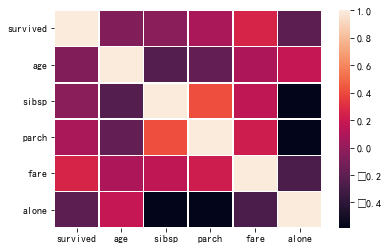

In [131]:
# 删除数据。这个步骤只能运行一次，否则系统会报错。
# 从表示相关性的热力图可以发现，pclass和adult_male与survied相关性非常差，所以删除他们
# data = data.drop(columns=["pclass","adult_male"])
# print(data.columns,data.shape)

# 上述删除操作只能运行一次。当第一次运行时，指定的columns被删除。第二次运行时会出现找不到属性的报错。
# 为了程序运行流畅，也可以做如下改写。
print("删除操作之前-----\n",data.columns,data.shape)
if "pclass" in data.columns:
    data = data.drop(columns=["pclass"])
    print(data.columns,data.shape)
else:
    print("pclass 属性已经被删除")
if 'adult_male' in data.columns:
    data = data.drop(columns=['adult_male'])
    print(data.columns,data.shape)
else:
    print("adult_male属性已经被删除")
if 'alive' in data.columns:
    data = data.drop(columns=['alive'])
    print(data.columns,data.shape)
else:
    print("alive属性已经被删除")

# 删除之后，再一次做热力图
import seaborn as sns  #使用sns做热力图，观察变量间的相关性
sns.heatmap(data.corr(),linewidths=.5)